In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

 1) Сгенерировать значение $\theta$ из равномерного распределения на отрезке [-10, 10].

In [41]:
theta = stats.uniform.rvs(-10, 20)
theta

6.382890718199498

2) Сгенерировать выборку $X_1, \dots , X_{1000}$ из распределения Коши с плотностью $p_{\theta} (x) = \frac{1}{\pi (1 + (x - \theta)^2)}$

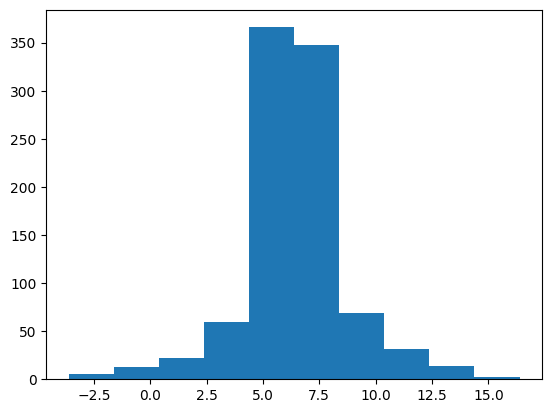

In [42]:
X = np.array(stats.cauchy.rvs(size=1000, loc=theta))
plt.hist(X, range = (-10 + theta, 10 + theta))
plt.show()

3) Найти выборочную медиану $\hat{\theta}$  и выборочное среднее $\overline{X}$.

In [43]:
medians = [np.median(X)]
means = [np.mean(X)]
print('median', medians[0])
print('mean', means[0])

median 6.373084767777474
mean 1.4454579279320943


4) Проделать шаги 2 - 3 еще 100 раз, получив набор из 101 значения выборочной медианы и 101 значения выборочного среднего.

In [44]:
for i in range (100):
    X = np.array(stats.cauchy.rvs(size=1000, loc=theta))
    medians.append(np.median(X))
    means.append(np.mean(X))

5) Построить гистограмму по 101 полученному значению величины $\hat{\theta}$ и
провести вертикальную линию, соответствующую значению $\theta$.

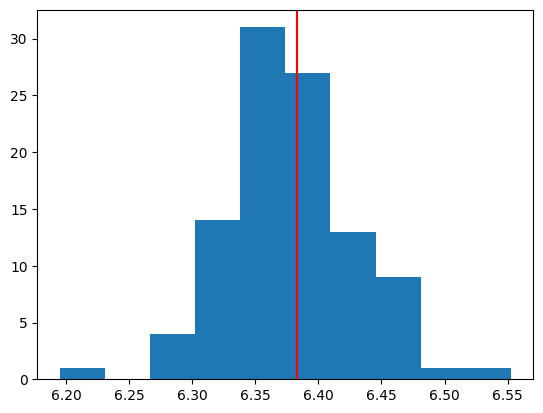

In [45]:
plt.hist(medians)
plt.axvline(x = theta, color='red')
plt.show()

6) Построить гистограмму, аналогичную той, которая была в предыдущем пункте, используя при этом $\overline{X}$ вместо $\hat{\theta}$.


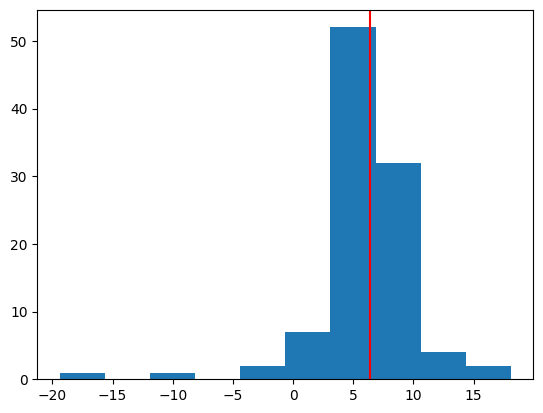

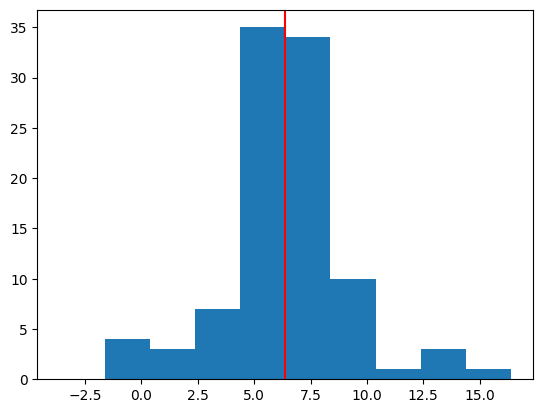

In [46]:
plt.hist(means)
plt.axvline(x = theta, color='red')
plt.show()
plt.hist(means, range = (-10 + theta, 10 + theta))
plt.axvline(x = theta, color='red')
plt.show()

7) Сделать вывод о том, какая статистика лучше оценивает параметр $\theta$

In [47]:
print(np.var(medians))
print(np.var(means))
# как будто в первом случае дисперсия чуть-чуть меньше, значит медиана лучше оценивает параметр

0.002680427248206353
17.486717890615076


8) Повторить шаги 1-7 еще 2 раза.

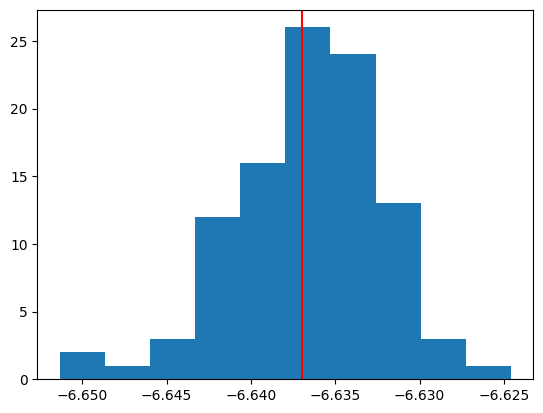

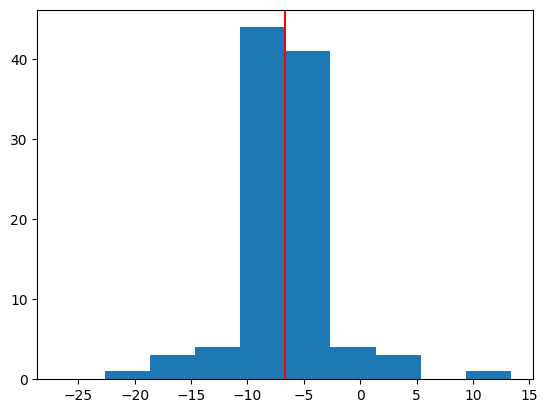

1.9549712418536624e-05
16.404290459685384


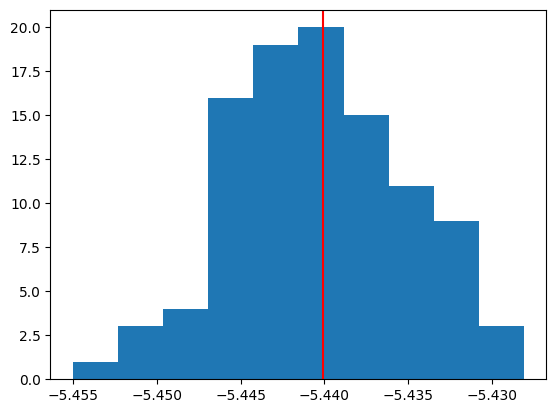

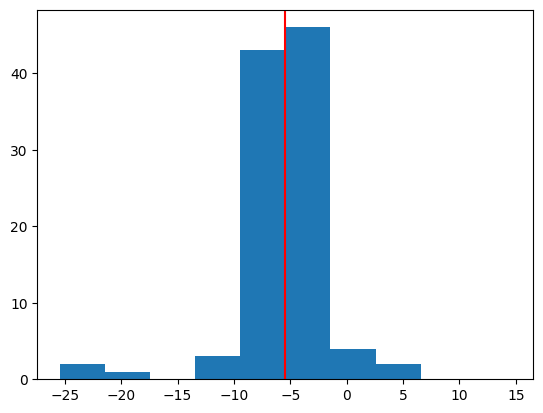

2.837875025653563e-05
14.559795088525746


In [55]:
for i in range (2):
    theta = stats.uniform.rvs(-10, 20)
    medians = []
    means = []
    for k in range (101):
        X = np.array(stats.cauchy.rvs(size=100000, loc=theta))
        medians.append(np.median(X))
        means.append(np.mean(X))
    plt.hist(medians)
    plt.axvline(x = theta, color='red')
    plt.show()
    plt.hist(means, range = (-20 + theta, 20 + theta))
    plt.axvline(x = theta, color='red')
    plt.show()
    print(np.var(medians))
    print(np.var(means))

9) Привести теоретическое объяснение результатов, полученных в ходе численного эксперимента.
10) Является ли $\hat\theta$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.
11) Является ли $\hat\theta$ асимптотически нормальной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построения вспомогательной гистограммы по 101 значению величины $\sqrt{n} (\hat\theta - \theta)$

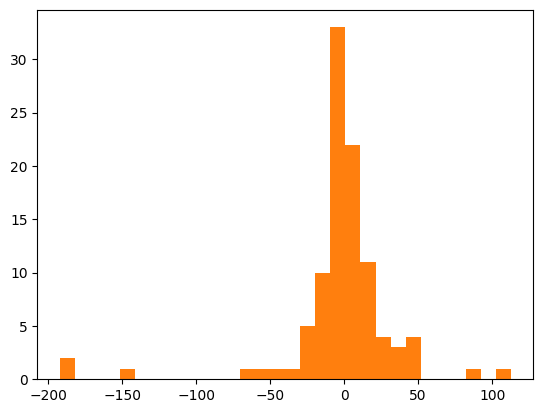

In [58]:
plt.hist(np.sqrt(len(medians)) * (medians - theta),bins=30)
plt.hist(np.sqrt(len(medians)) * (means - theta),bins=30)
# plt.plot(np.linspace(-2, 2, 101), stats.norm.pdf(np.linspace(-2, 2, 101), 0, np.pi / 4))
plt.show()

по т. о выборочной медиане, $\sqrt{n} (\mu - z_{0.5}) \sim \mathcal{N}\left(0, \frac{1}{4 f^2(z_{0.5})}\right)$ значит, выборочная медиана -- асимптотически нормальная оценка с асимптотической дисперсией $\frac{\pi}{4}$.
выборочное среднее нельзя использовать для оценки $\theta$, т.к. у распределения коши нет математического ожидания 